In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [ ]:
class NeuralNetwork:
    
    def __init__(self, learning_rate):
        self.w = np.array([np.random.randn(), np.random.randn()])
        self.w0 = np.random.randn()
        self.learning_rate = learning_rate
        
    def _sigmoid(self, x): 
        return 1 / (1 + np.exp(-x))
    
    def _sigmoid_deriv(self, x): 
        return self._sigmoid(x) * (1 - self._sigmoid(x))
    
    def predict(self, input_vector): 
        prediction = self._sigmoid(np.dot(input_vector, self.w) + self.w0)        
        return prediction
    
    def _compute_gradients(self, input_vector, target):
        
        prediction = self.predict(input_vector) # Предсказание сети

            # производная квадратичной функции
        deriv_quad_func = 2 * (prediction - target)
        
            # производная сигмоиды
        deriv_sigmoid = self._sigmoid_deriv(np.dot(input_vector, self.w) + self.w0)
        
            #  производная аргумента сигмоиды по w0 равна 1
        deriv_w0 = 1
        
            #  производная по w равна вектору входных значений
        deriv_w = (0 * self.w) + (1 * input_vector)
        
            # вычисляем градиент (частные производные)
        derror_w0 = (deriv_quad_func * deriv_sigmoid * deriv_w0)
        derror_w = (deriv_quad_func * deriv_sigmoid * deriv_w)
        return derror_w0, derror_w
    
    
    def _update_parameters(self, derror_w0, derror_w):
        self.w0 = self.w0 - (derror_w0 * self.learning_rate)
        self.w = self.w - (derror_w * self.learning_rate)        
        
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            
            # случайно выбираем номер элемента в массиве входных данных, по которому будет осуществляться градиентный спуск на данной итерации
            random_data_index = np.random.randint(len(input_vectors))
            # по выбранному номеру получаем входной вектор и реальное значение для сравнения
            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]
            
            # вычисляем градиент (частные производные)
            derror_w0, derror_w = self._compute_gradients(input_vector, target)
            
            # производим пересчёт весов
            self._update_parameters(derror_w0, derror_w)
            
            # вычисляем совокупную ошибку каждые 100 итераций
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # в цикле проверяем все входные данные
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]
                    
                    #  делаем предсказание на текущих данных
                    prediction = self.predict(data_point)
                    
                    # получаем разность квадратов расстояния результата от реального значения
                    error = np.square(prediction - target)   
                    
                    cumulative_error = cumulative_error + error
                    
                cumulative_errors.append(cumulative_error)
        return cumulative_errors

In [ ]:
learning_rate = 0.1

input_vectors = np.array([
    [3, 1.5], 
    [2, 1], 
    [4, 1.5], 
    [3, 4], 
    [3.5, 0.5], 
    [2, 0.5], 
    [5.5, 1], 
    [1, 1], 
    [1, 2], 
    [1.2, 0.9]
    ])

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])


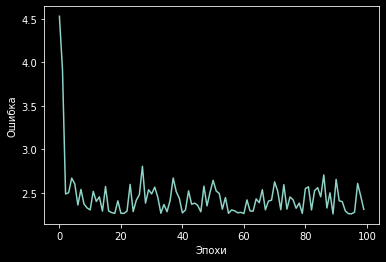

In [ ]:
neural_network = NeuralNetwork(learning_rate)
training_error = neural_network.train(input_vectors, targets, 10000)
plt.plot(training_error)
plt.xlabel("Эпохи")
plt.ylabel("Ошибка")
plt.show()

In [ ]:
np.mean(training_error)

2.453023167731881